In [3]:
import time
import numpy as np
from matplotlib import pyplot as plt

### **Exercise1:**

Plot a rainbow

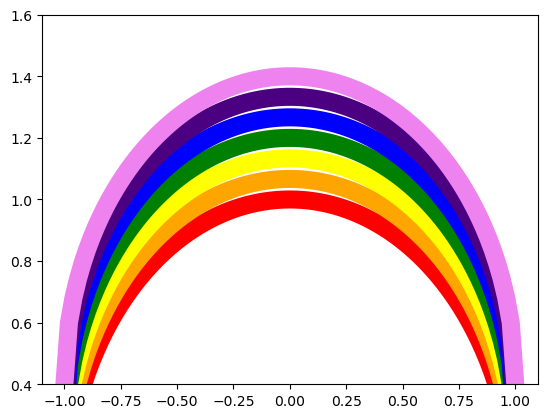

In [23]:
x = np.linspace(-1, 1, 100)
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
r = 1
plt.ylim([0.4, 1.6])
for i in range(len(colors)):
    y = np.sqrt(r**2 - x**2) + i/15
    plt.plot(x, y, c=colors[i], lw=13, marker='o')
plt.show()


### **Exercise2:**

Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

In [26]:
def recaman(max_terms):
    seq=np.empty(max_terms)
    exist = set([])
    n = 0 
    a = 0
    while n < max_terms:
        diff=a-n
        if diff > 0 and diff not in exist:
            a = diff
        else:
            a = a + n
        seq[n]=a
        exist.add(a)
        n += 1
    return seq

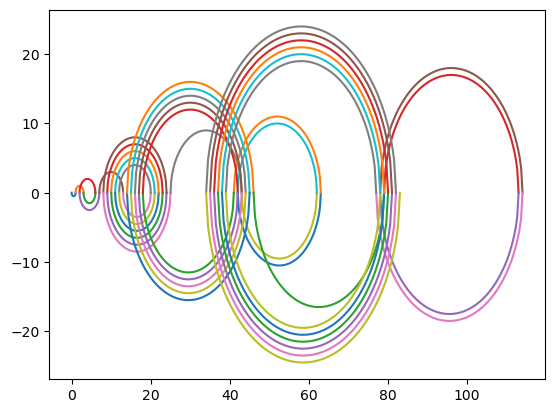

In [37]:
seq = recaman(50)
for i in range(1, len(seq)):
    h = (seq[i] + seq[i-1])/2
    r = abs((seq[i] - seq[i-1]))/2
    x = np.linspace(seq[i], seq[i-1], 100)
    y = (-1)**i * np.sqrt(r**2 - (x-h)**2)
    plt.plot(x, y)

### **Exercise3:**

Write a matrix multiplication fucntion using lists ("manually", like you did in c++) and another one using numpy arrays (call matmul function). Time them both. 

In [60]:
A = [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
B = [[1, 2, 3, 4],
     [1, 2, 3, 4],
     [1, 2, 3, 4]]

[[6, 12, 18, 24], [6, 12, 18, 24], [6, 12, 18, 24]]

Using standard lists

In [ ]:
def matrix_multiplication(A, B):
    C = []
    for i in range(len(A)): 
        row = []
        for j in range(len(B[0])):
            sum = 0
            for k in range(len(A[1])):
                sum += A[i][k] * B[k][j]
            row.append(sum)
        C.append(row)
    return C

In [61]:
%%timeit
matrix_multiplication(A, B)  

11.1 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Using numpy arrays: we can see it is much faster

In [70]:
A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
B = np.array([[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]])

In [74]:
%%timeit
np.matmul(A, B)

1.78 µs ± 37 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### **Exercise4:**

Read the "extra exercise from c++" about the Jacobi method to solve the Laplace equation. Implement the solver (without defining a class and just using numpy array as a mesh) for the equation with the same boundary conditions. Try to get the same final picture and gif as the c++ version. Hint: you can plot a matrix with plt.imshow(MATRIX_TO_PLOT). The gif creation example scipt is in the file `anym.py` (not in the Jupyterlab as it has troubles displaying and sometimes even producing gifs, rememeber that you can export your notebooks into `.py` files by `Files->Export Notebook as... -> Export Notebook as executable script`)

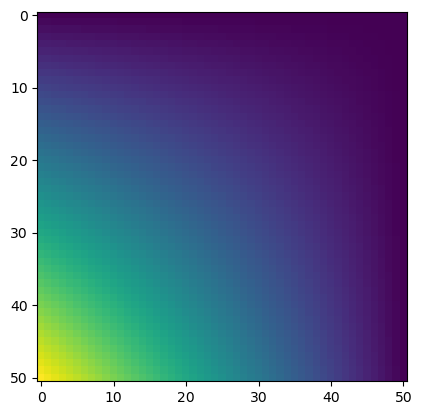

In [149]:
def Jacobi_solver(n, n_iter):
    mesh = np.zeros((n+1, n+1), dtype = "float")
    # Initial setup
    for i in range(0, mesh.shape[1]):
        mesh[i, 0] = (100/n) * i
        mesh[mesh.shape[1]-1, i] = (100/n) * (mesh.shape[1] - i - 1)
    for i in range(1, mesh.shape[1]-1):
        for j in range(1, mesh.shape[1]-1):
            mesh[i, j] = 0.5

    k = 0  
    while k < n_iter:
        k += 1
        mesh_old = mesh #since we need to use old values not new ones.
        for i in range(1, mesh.shape[1]-1):
            for j in range(1, mesh.shape[1]-1):
                mesh[i, j] = 0.25 * (mesh_old[i-1, j] + mesh_old[i+1, j] + mesh_old[i, j-1] + mesh_old[i, j+1])
    plt.imshow(mesh, interpolation = "none")

n = 50        #dimension of the grid
n_iter = 1000 #Number of iterations
Jacobi_solver(n, n_iter)

In [6]:
l = []
A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
A

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [8]:
l.append(A)
l[0]

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### **Exercise5:**
Implement [Conway's game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy array to hold data and animation technique from the previous exercise (or any other if you know it).\
Neighbours are defined as adjacent cells.
- Any LIVING cell with 2 or 3 neighbours survives.
- Any DEAD cell with 3 neighbours comes alive.
- Any OTHER LIVING cell dies.

All deaths and births occur simultaneously

In [25]:
def extend_matrix_naive(A):
    """
    Given a matrix surrounds it by a frame of zeros
    This could be implemented better by pasting two rows and columns instead of 
      iterating through the whole thing
    """
    nrow = len(A) # Nrows
    ncol = len(A[0]) #Ncol assuming A is not empty
    R = np.zeros((nrow + 2, ncol + 2), dtype = "int")
    for i in range(1, nrow+1):
        for j in range(1, ncol+1):
            R[i][j] = A[i-1][j-1]
    return R

def count_neighbours(A, i, j):
    count = A[i-1][j-1] + A[i-1][j] + A[i-1][j+1] + A[i][j-1] + A[i][j+1] + A[i+1][j-1] + A[i+1][j] + A[i+1][j+1]
    return count


def Conway(A, max_iter):
    """
    Given a matrix A and a number of maximum iterations it simulates Conway Game of life.
    Alive cells are denoted by 1 and dead ones are denoted by 0
    """
    # I enlarge the matrix A to be surrounded by some empty cells which will not be modified
    # First of all we add a row on top and a row at the bottom of zeroes
    nrow = len(A) # Nrows
    ncol = len(A[0]) #Ncol assuming A is not empty
    A = extend_matrix_naive(A)
    k = 0 #Number of iterations the system survives
    print("iteration", k, ":\n", A)
    while np.sum(A) != 0 and k < max_iter:
        k += 1
        A_new = A.copy()
        for i in range(1, nrow+1):
            for j in range(1, ncol+1):
                c = count_neighbours(A, i, j)
                match A[i][j]:
                    case 1: #Alive
                        if c < 2 or c > 3:
                            A_new[i][j] = 0
                    case 0: #Dead
                        if c==3:
                            A_new[i][j] = 1
        A = A_new
        print("iteration", k, ":\n", A)                                        

In [26]:
A = np.array([[1, 0, 1, 1], [0, 0, 1, 0], [0, 1, 1, 0]])
print(A)
Conway(A, 1000)

[[1 0 1 1]
 [0 0 1 0]
 [0 1 1 0]]
iteration 0 :
 [[0 0 0 0 0 0]
 [0 1 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]
iteration 1 :
 [[0 0 0 0 0 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]
iteration 2 :
 [[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
iteration 3 :
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [23]:
Conway(A, 10)

iteration 0 :
 [[0 0 0 0 0 0]
 [0 1 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]
iteration 1 :
 [[0 0 0 0 0 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]
iteration 2 :
 [[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
iteration 3 :
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


### **Exercise6 (for those from data science following statistics course):**

Choose some howework from the statistics course that you've done in R and try to rewrite it using numpy.